Task 1


In [33]:
import requests
from bs4 import BeautifulSoup

def get_patent_claims(patent_number):
    url = f"https://patents.google.com/patent/{patent_number}/en"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    claims = soup.find_all('div', {'class': 'claim'})
    claims_text = [claim.get_text(strip=True) for claim in claims]
    return claims_text

patent_numbers = ['US20100238865A1', 'US20070178504A1', 'US20100029327A1']
all_claims = []

for patent_number in patent_numbers:
    claims = get_patent_claims(patent_number)
    all_claims.extend(claims)

# Save claims to a file or process them further
with open('patent_claims.txt', 'w') as f:
    for claim in all_claims:
        f.write("%s\n" % claim)


Task 2


In [34]:
import pandas as pd

# Load claims
with open('patent_claims.txt', 'r') as f:
    claims = f.readlines()

# Display first few claims
print(claims[:5])


['1. A method in a mobile communication device for communicating in a wireless communication network, the method comprising the acts of:receiving and decoding a plurality of packet data bursts over a packet data channel of a serving cell;while receiving and decoding the packet data bursts, receiving and decoding a plurality of broadcast data bursts over a broadcast control channel of a neighbor cell;when a time conflict exists between receiving and decoding at least one of the packet data bursts and receiving and decoding at least one of the broadcast data bursts:receiving and decoding the at least one packet data burst instead of the at least one broadcast data burst when no imminent call drop between the mobile communication device and the serving cell is identified; andreceiving and decoding the at least one broadcast data burst instead of the at least one packet data burst when an imminent call drop between the mobile communication device and the serving cell is identified.\n', '1.

Method 1: K-Means Clustering

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorize the claims using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(claims)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Display the result
kmeans_results = pd.DataFrame({'Claim': claims, 'KMeans_Label': kmeans_labels})
print(kmeans_results.head(10))


                                               Claim  KMeans_Label
0  1. A method in a mobile communication device f...             0
1  1. A method in a mobile communication device f...             0
2  2. The method ofclaim 1, wherein the broadcast...             0
3  3. The method ofclaim 1, wherein the plurality...             0
4  4. The method ofclaim 1, wherein the broadcast...             0
5  5. The method ofclaim 1, further comprising:id...             0
6  6. The method ofclaim 1, wherein the wireless ...             0
7  7. A mobile communication device, comprising:a...             0
8  7. A mobile communication device, comprising:a...             0
9  8. The mobile communication device ofclaim 7, ...             0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Latent Dirichlet Allocation (LDA)


In [36]:
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda_labels = lda.fit_transform(X).argmax(axis=1)

# Display the result
lda_results = pd.DataFrame({'Claim': claims, 'LDA_Label': lda_labels})
print(lda_results.head(10))


                                               Claim  LDA_Label
0  1. A method in a mobile communication device f...          1
1  1. A method in a mobile communication device f...          1
2  2. The method ofclaim 1, wherein the broadcast...          1
3  3. The method ofclaim 1, wherein the plurality...          1
4  4. The method ofclaim 1, wherein the broadcast...          1
5  5. The method ofclaim 1, further comprising:id...          1
6  6. The method ofclaim 1, wherein the wireless ...          1
7  7. A mobile communication device, comprising:a...          1
8  7. A mobile communication device, comprising:a...          1
9  8. The mobile communication device ofclaim 7, ...          1


Method 3: BERT Embeddings with K-Means Clustering

In [37]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained BERT model and get embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(claims)

# Compute cosine similarity and apply K-Means Clustering
kmeans_bert = KMeans(n_clusters=3, random_state=42)
bert_labels = kmeans_bert.fit_predict(embeddings)

# Display the result
bert_results = pd.DataFrame({'Claim': claims, 'BERT_Label': bert_labels})
print(bert_results.head())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                               Claim  BERT_Label
0  1. A method in a mobile communication device f...           1
1  1. A method in a mobile communication device f...           1
2  2. The method ofclaim 1, wherein the broadcast...           1
3  3. The method ofclaim 1, wherein the plurality...           1
4  4. The method ofclaim 1, wherein the broadcast...           1


Compare Methods

In [38]:
# Combine results into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Claim': claims,
    'KMeans_Label': kmeans_labels,
    'LDA_Label': lda_labels,
    'BERT_Label': bert_labels
})

# Display the combined results
print(comparison_df.head(10))

# Function to print claims in each group
def print_grouped_claims(df, method_label):
    grouped = df.groupby(method_label)
    for label, group in grouped:
        print(f"\nGroup {label}:")
        for claim in group['Claim']:
            print(f" - {claim.strip()[:100]}...")

# Print groups for each method
print("K-Means Clustering Groups:")
print_grouped_claims(comparison_df, 'KMeans_Label')

print("\nLDA Groups:")
print_grouped_claims(comparison_df, 'LDA_Label')

print("\nBERT Embeddings with K-Means Clustering Groups:")
print_grouped_claims(comparison_df, 'BERT_Label')


                                               Claim  KMeans_Label  LDA_Label  \
0  1. A method in a mobile communication device f...             0          1   
1  1. A method in a mobile communication device f...             0          1   
2  2. The method ofclaim 1, wherein the broadcast...             0          1   
3  3. The method ofclaim 1, wherein the plurality...             0          1   
4  4. The method ofclaim 1, wherein the broadcast...             0          1   
5  5. The method ofclaim 1, further comprising:id...             0          1   
6  6. The method ofclaim 1, wherein the wireless ...             0          1   
7  7. A mobile communication device, comprising:a...             0          1   
8  7. A mobile communication device, comprising:a...             0          1   
9  8. The mobile communication device ofclaim 7, ...             0          1   

   BERT_Label  
0           1  
1           1  
2           1  
3           1  
4           1  
5           

# Comparison Criteria

**t-SNE Visualization** - These are used to reduce the dimensionality of the embeddings and visualize the clusters in 2D space.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


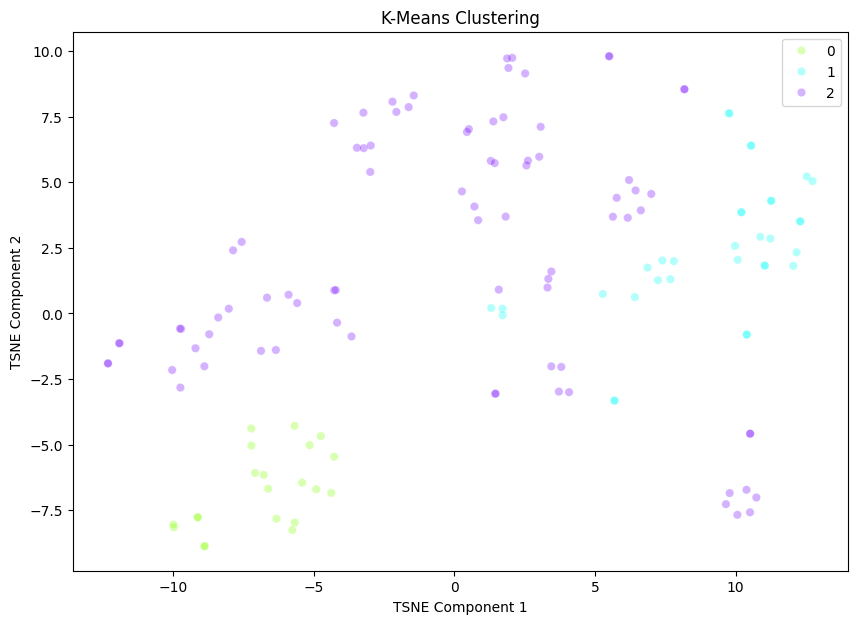

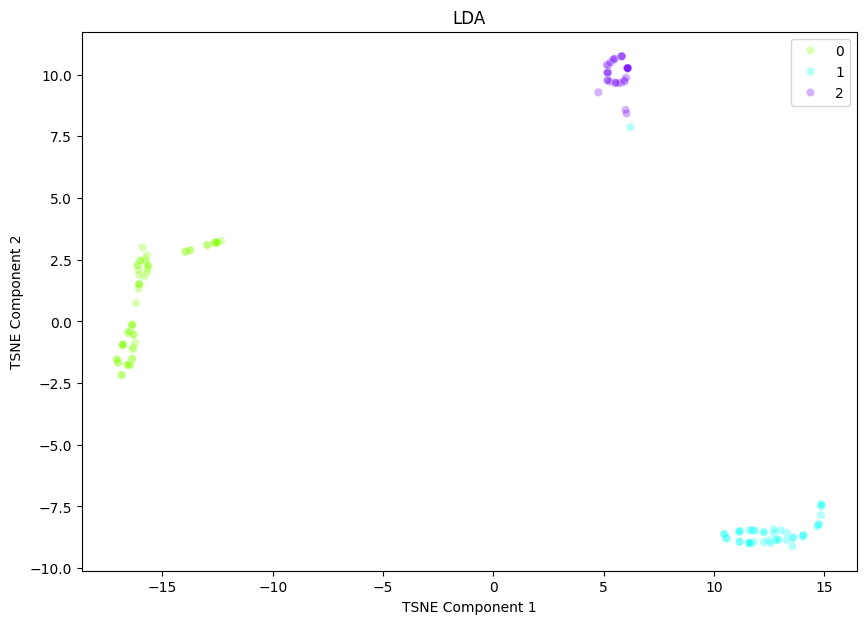

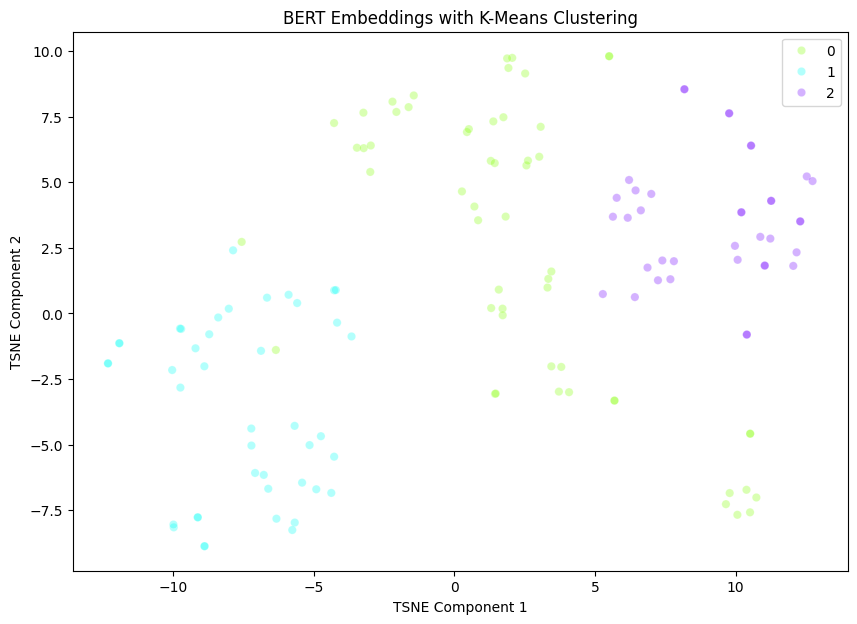

In [39]:
# Install the required package
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

# Load claims
with open('patent_claims.txt', 'r') as f:
    claims = f.readlines()

# Method 1: K-Means Clustering
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(claims)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
kmeans_labels = kmeans.labels_

# Method 2: LDA
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda_labels = lda.fit_transform(X).argmax(axis=1)

# Method 3: BERT Embeddings with K-Means Clustering
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(claims)
cosine_sim = cosine_similarity(embeddings)
kmeans_bert = KMeans(n_clusters=3, random_state=42).fit(cosine_sim)
bert_labels = kmeans_bert.labels_

# Apply t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Plotting function
def plot_clusters(embeddings_2d, labels, title):
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        x=embeddings_2d[:, 0], y=embeddings_2d[:, 1],
        hue=labels, palette=sns.color_palette("hsv", len(set(labels))),
        legend="full", alpha=0.3
    )
    plt.title(title)
    plt.xlabel('TSNE Component 1')
    plt.ylabel('TSNE Component 2')
    plt.show()

# Plot K-Means Clustering
plot_clusters(embeddings_2d, kmeans_labels, 'K-Means Clustering')

# Apply t-SNE to LDA topic distribution
lda_embeddings_2d = tsne.fit_transform(lda.fit_transform(X))
plot_clusters(lda_embeddings_2d, lda_labels, 'LDA')

# Plot BERT Embeddings with K-Means Clustering
plot_clusters(embeddings_2d, bert_labels, 'BERT Embeddings with K-Means Clustering')


** PCA Visualization ** - dimensionality reduction technique that can help visualize high-dimensional data in 2D.


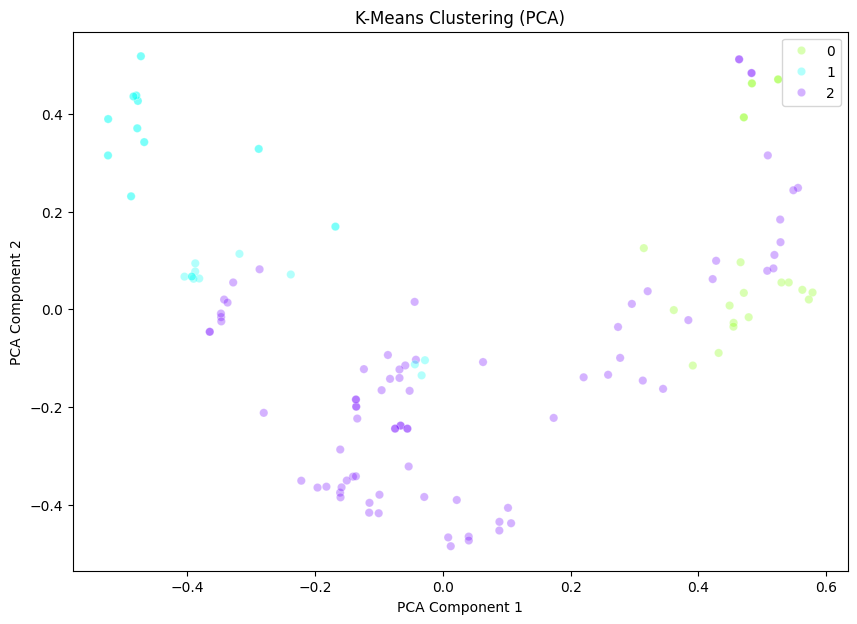

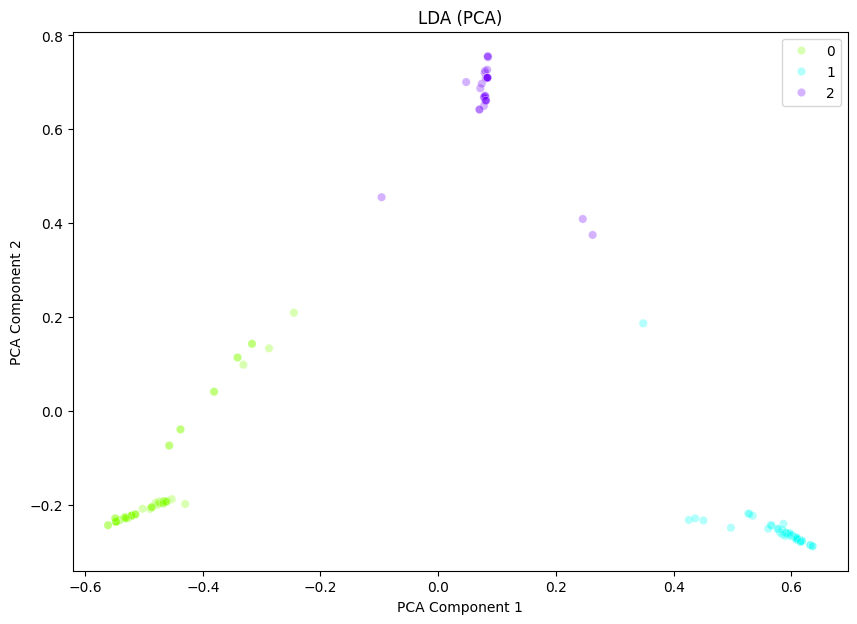

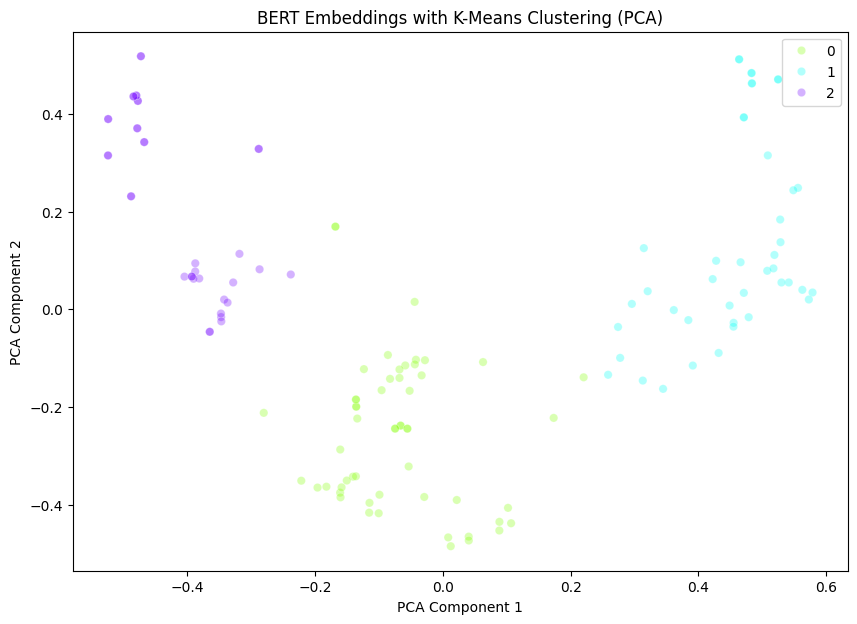

In [40]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
embeddings_pca_2d = pca.fit_transform(embeddings)

# Plotting function
def plot_pca_clusters(embeddings_2d, labels, title):
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        x=embeddings_2d[:, 0], y=embeddings_2d[:, 1],
        hue=labels, palette=sns.color_palette("hsv", len(set(labels))),
        legend="full", alpha=0.3
    )
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Plot K-Means Clustering using PCA
plot_pca_clusters(embeddings_pca_2d, kmeans_labels, 'K-Means Clustering (PCA)')

# Plot LDA using PCA
lda_pca_2d = pca.fit_transform(lda.fit_transform(X))
plot_pca_clusters(lda_pca_2d, lda_labels, 'LDA (PCA)')

# Plot BERT Embeddings with K-Means Clustering using PCA
plot_pca_clusters(embeddings_pca_2d, bert_labels, 'BERT Embeddings with K-Means Clustering (PCA)')


**Silhouette Analysis** - Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters.

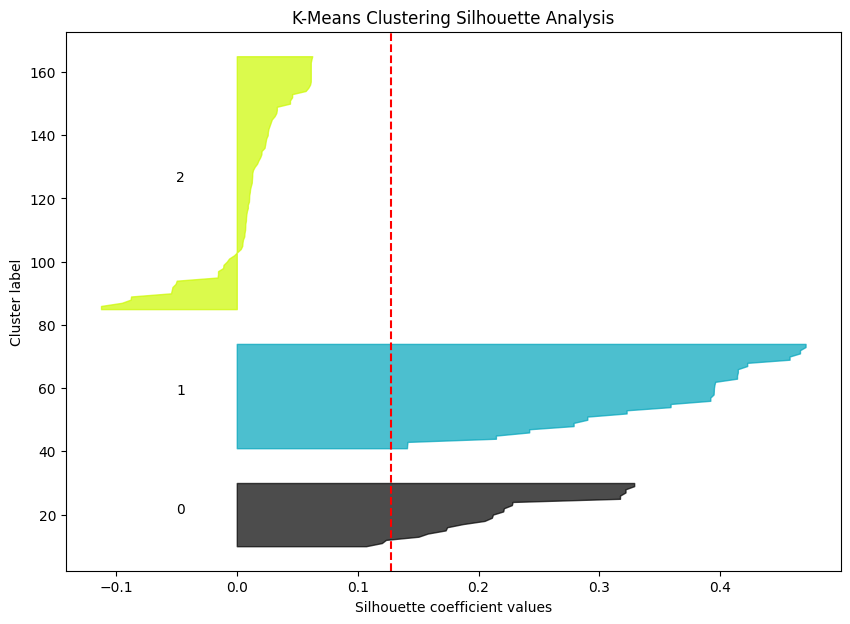

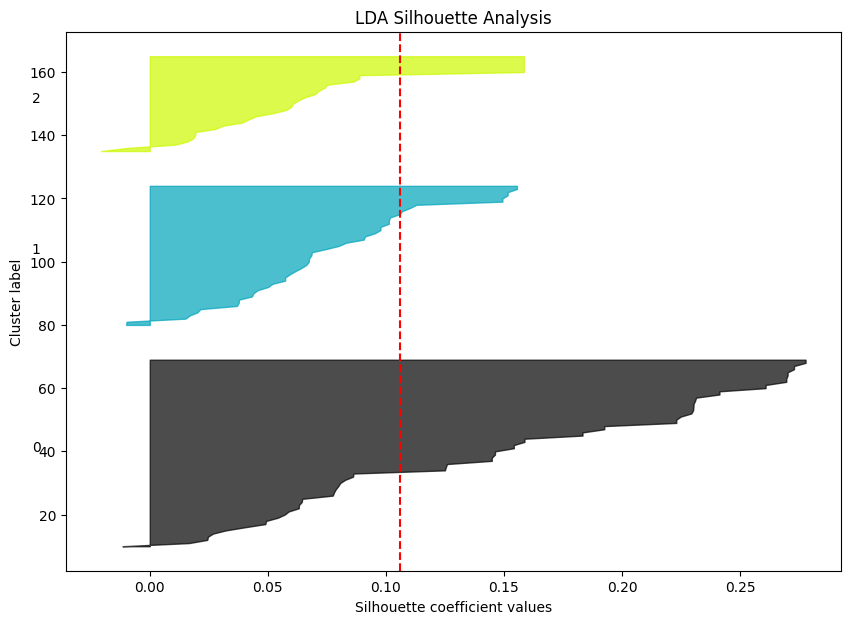

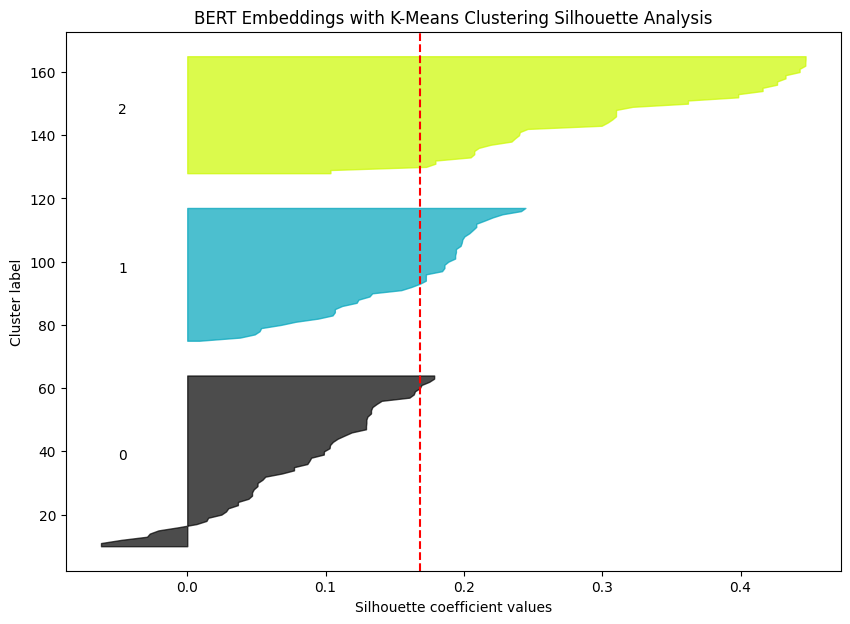

In [41]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

def plot_silhouette_analysis(X, labels, title):
    silhouette_avg = silhouette_score(X, labels)
    sample_silhouette_values = silhouette_samples(X, labels)

    plt.figure(figsize=(10, 7))
    y_lower = 10
    for i in range(len(set(labels))):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / len(set(labels)))
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title(title)
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.show()

# Plot Silhouette Analysis for K-Means Clustering
plot_silhouette_analysis(X, kmeans_labels, 'K-Means Clustering Silhouette Analysis')

# Plot Silhouette Analysis for LDA
plot_silhouette_analysis(X, lda_labels, 'LDA Silhouette Analysis')

# Plot Silhouette Analysis for BERT Embeddings with K-Means Clustering
plot_silhouette_analysis(embeddings, bert_labels, 'BERT Embeddings with K-Means Clustering Silhouette Analysis')


## Chosen Method: BERT Embeddings with K-Means Clustering